In [1]:
import pandas as pd

# Q - ️Import & Explore the Data

In [9]:

# Load the dataset
df = pd.read_csv('/content/sales_data.csv')


In [11]:
# 1. Display first 5 rows
df.head(5)

,Order_ID,Date,Store_Location,Product_Category,Units_Sold,Unit_Price,Discount,Total_Sales,Profit
0,1,2022-01-01,Houston,Furniture,28,454.55,10,12727.40,2545.48
1,2,2022-01-30,Miami,Furniture,7,141.13,10,987.91,197.58
2,3,2022-03-01,Los Angeles,Furniture,9,50.80,0,457.20,91.44
3,4,2022-03-31,Miami,Toys,8,177.40,25,1419.20,283.84
4,5,2022-04-30,Miami,Grocery,12,100.93,20,1211.16,242.23


In [12]:
# 2. Display data types
df.dtypes

,0
Order_ID,int64
Date,object
Store_Location,object
Product_Category,object
Units_Sold,int64
Unit_Price,float64
Discount,int64
Total_Sales,float64
Profit,float64


In [13]:
# 3. Missing values per column
df.isnull().sum()

,0
Order_ID,0
Date,0
Store_Location,0
Product_Category,0
Units_Sold,0
Unit_Price,0
Discount,0
Total_Sales,0
Profit,0


In [14]:
# 4. Number of unique stores
df["Store_Location"].nunique()

5

In [15]:
# 5. Number of unique product categories
df["Product_Category"].nunique()

5

# Q- Data Cleaning

In [17]:
# Replace missing numerical values with column mean
df[["Units_Sold", "Unit_Price", "Profit"]] = df[["Units_Sold", "Unit_Price", "Profit"]].fillna(
    df[["Units_Sold", "Unit_Price", "Profit"]].mean())


In [18]:
# Replace missing categorical values with mode

# Categorical columns
df["Store_Location"] = df["Store_Location"].fillna(df["Store_Location"].mode()[0])
df["Product_Category"] = df["Product_Category"].fillna(df["Product_Category"].mode()[0])

In [19]:
#Convert the Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])


In [20]:
# Extract month number from the Date column
df["Month"] = df["Date"].dt.month


In [21]:
df.head(5)

,Order_ID,Date,Store_Location,Product_Category,Units_Sold,Unit_Price,Discount,Total_Sales,Profit,Month
0,1,2022-01-01,Houston,Furniture,28,454.55,10,12727.40,2545.48,1
1,2,2022-01-30,Miami,Furniture,7,141.13,10,987.91,197.58,1
2,3,2022-03-01,Los Angeles,Furniture,9,50.80,0,457.20,91.44,3
3,4,2022-03-31,Miami,Toys,8,177.40,25,1419.20,283.84,3
4,5,2022-04-30,Miami,Grocery,12,100.93,20,1211.16,242.23,4


# Task 3 — Data Transformation

In [22]:
# Create a new column Revenue
df["Revenue"] = df["Units_Sold"] * df["Unit_Price"]


In [23]:
# Create a new column for discounted sales
df["Discounted_Sales"] = df["Revenue"] - (df["Revenue"] * df["Discount"] / 100)


In [24]:
# Normalize the Profit column using Min-Max scaling
df["Profit_Normalized"] = (df["Profit"] - df["Profit"].min()) / (df["Profit"].max() - df["Profit"].min())


# Task 4 — Exploratory Data Analysis

In [25]:
# Calculate average sales per month
average_sales_per_month = df.groupby("Month")["Total_Sales"].mean()
print(average_sales_per_month)


Month
1      8870.8620
2      9247.3600
3     10324.1160
4      5194.2175
5      9496.4400
6      8296.4750
7      9928.5900
8     15275.4400
9      5895.5975
10     4486.7050
11    14074.4325
12     5343.1920
Name: Total_Sales, dtype: float64


In [26]:
# Calculate total profit per store
total_profit_per_store = df.groupby("Store_Location")["Profit"].sum()
print(total_profit_per_store)


Store_Location
Chicago        25868.30
Houston        22530.36
Los Angeles    21405.79
Miami          15218.22
New York        3182.24
Name: Profit, dtype: float64


In [27]:
# Find top 3 product categories by revenue
top3_categories = df.groupby("Product_Category")["Revenue"].sum().nlargest(3)
print(top3_categories)


Product_Category
Furniture      147564.95
Clothing       112852.52
Electronics     85761.39
Name: Revenue, dtype: float64


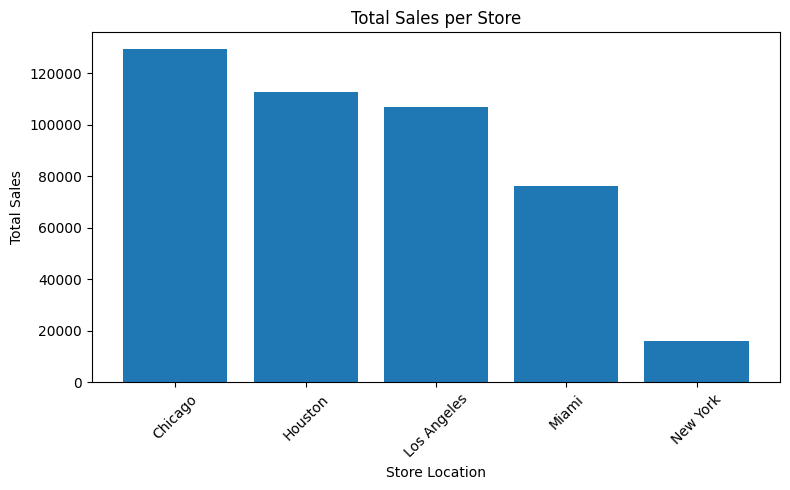

In [28]:
# Bar chart of total sales per store
import matplotlib.pyplot as plt

store_sales = df.groupby("Store_Location")["Total_Sales"].sum()

plt.figure(figsize=(8,5))
plt.bar(store_sales.index, store_sales.values)
plt.xlabel("Store Location")
plt.ylabel("Total Sales")
plt.title("Total Sales per Store")
plt.xticks(rotation=45)
plt.tight_layout()


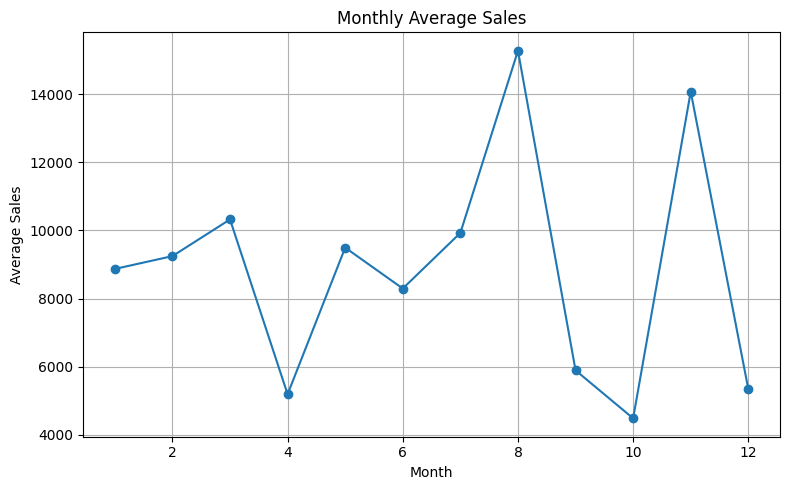

In [29]:
# Line chart of monthly average sales
import matplotlib.pyplot as plt

monthly_avg_sales = df.groupby("Month")["Total_Sales"].mean()

plt.figure(figsize=(8,5))
plt.plot(monthly_avg_sales.index, monthly_avg_sales.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.title("Monthly Average Sales")
plt.grid(True)
plt.tight_layout()


<Figure size 800x500 with 0 Axes>

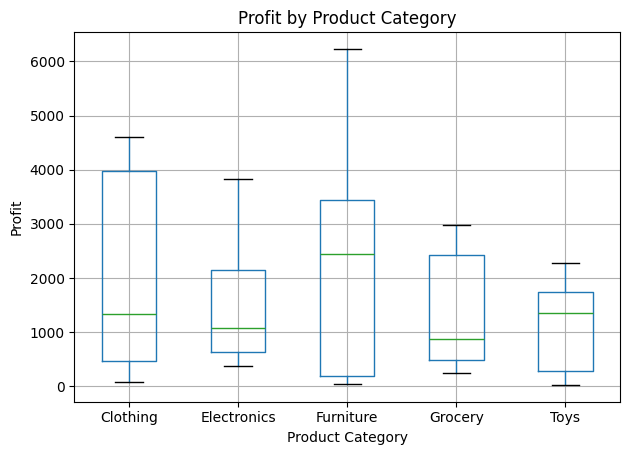

In [34]:
# Boxplot of profit by product category
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.boxplot(column="Profit", by="Product_Category")
plt.title("Profit by Product Category")
plt.suptitle("")  # removes automatic extra title
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.tight_layout()


# ✅ Task 5 — Statistical Summary

In [35]:
# Mean of Profit
profit_mean = df["Profit"].mean()
print("Mean:", profit_mean)

# Median of Profit
profit_median = df["Profit"].median()
print("Median:", profit_median)

# Mode of Profit
profit_mode = df["Profit"].mode()[0]
print("Mode:", profit_mode)

# Standard deviation of Profit
profit_std = df["Profit"].std()
print("Standard Deviation:", profit_std)


Mean: 1764.0981999999997
Median: 1153.9099999999999
Mode: 27.43
Standard Deviation: 1621.6005811425944


In [36]:
# Correlation matrix between key numerical columns
corr_matrix = df[["Units_Sold", "Unit_Price", "Discount", "Profit", "Revenue"]].corr()
print(corr_matrix)


            Units_Sold  Unit_Price  Discount    Profit   Revenue
Units_Sold    1.000000    0.198606 -0.056294  0.665482  0.665482
Unit_Price    0.198606    1.000000  0.155307  0.784523  0.784523
Discount     -0.056294    0.155307  1.000000  0.132474  0.132474
Profit        0.665482    0.784523  0.132474  1.000000  1.000000
Revenue       0.665482    0.784523  0.132474  1.000000  1.000000


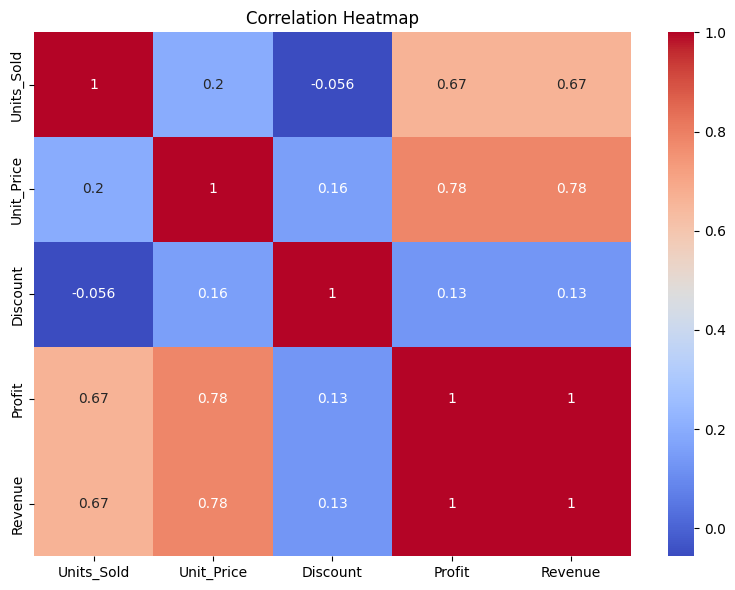

In [37]:
# Heatmap of the correlation matrix
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()


# ✅ Task 6 — Simple Predictive Model (Linear Regression)

In [38]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X = df[["Units_Sold", "Unit_Price", "Discount"]]   # features
y = df["Profit"]                                   # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [39]:
# Train the Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [40]:
# Predict profit values for the test set
y_pred = model.predict(X_test)


In [41]:
# Evaluate model performance using R² Score and Mean Absolute Error
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)


R² Score: 0.8267087241950132
Mean Absolute Error (MAE): 390.5554911408549


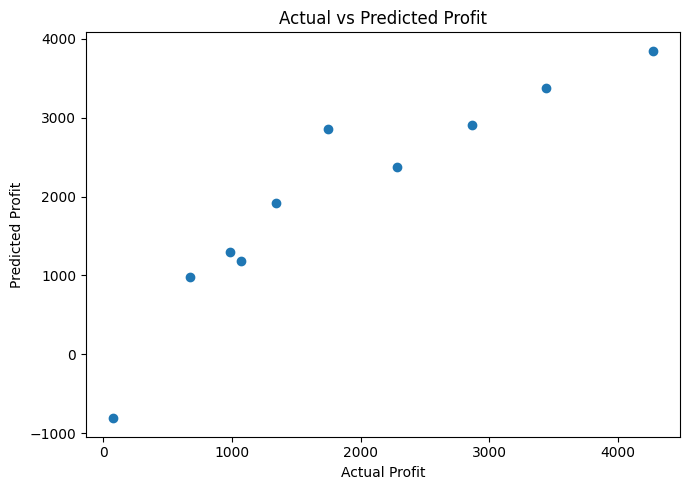

In [42]:
# Scatter plot of actual vs predicted profit
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.tight_layout()
